# Explore here

   Rank                                  Song  Popularity  Duration_in_min
0     1  Here Comes The Sun - Remastered 2009          82             3.10
1     2           Yesterday - Remastered 2009          76             2.09
2     3           Let It Be - Remastered 2009          77             4.05
3     4           Blackbird - Remastered 2009          76             2.31
4     5          In My Life - Remastered 2009          76             2.44
5     6     Twist And Shout - Remastered 2009          76             2.59
6     7       Come Together - Remastered 2009          75             4.33
7     8                   Hey Jude - 2015 Mix          66             7.19
8     9           Something - Remastered 2009          72             3.04
9    10      And I Love Her - Remastered 2009          72             2.49


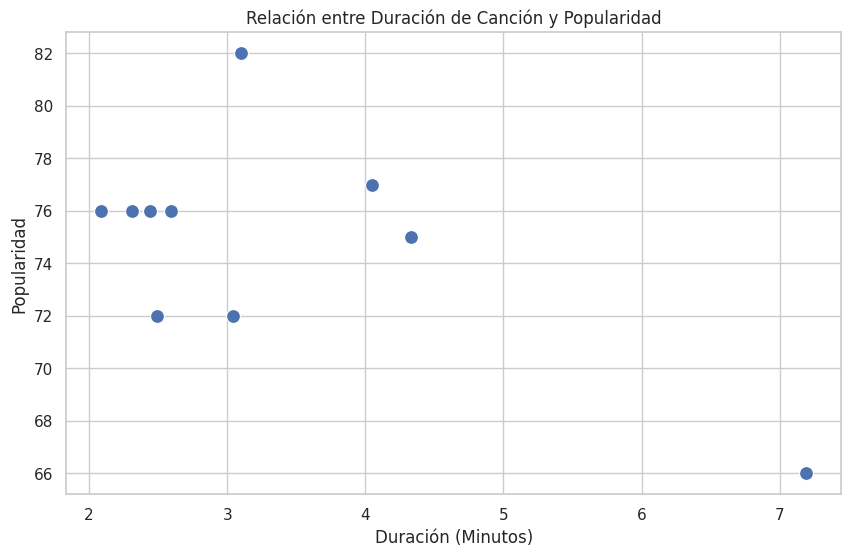

In [28]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

# Obtenemos las credenciales 
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


# Nos aseguramos que las credenciales se han cargado correctamente
if not client_id or not client_secret:
    raise ValueError("Las credenciales no están definidos en el archivo .env")


artist_id = "3WrFJ7ztbogyGnTHbHJFl2"


# Autenticación en Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


# Creamos la función get_top_tracks para obtener el Top 10 canciones del artista
def get_top_tracks (artist_id, limit=10):
    
    # Top canciones del artista
    top_tracks = spotify.artist_top_tracks(artist_id)['tracks'][:limit]
    
    # Creamos lista vacia para ir guardando las canciones
    top_songs = []
    
    # Con el for extraemos la información que deseamos de la cancion
    for idx, track in enumerate(top_tracks):

        # Convertimos la duración de milisegundos a minutos
        duration_in_minutes = track['duration_ms'] / 1000 / 60

        top_songs.append({
            'Rank': idx + 1,
            'Song': track['name'],
            'Popularity': track['popularity'],
            'Duration_in_min': round(duration_in_minutes, 2)
        })

    return top_songs

top_songs = get_top_tracks(artist_id)

top_songs_df = pd.DataFrame(top_songs)

print (top_songs_df)

sns.set_theme(style = "whitegrid")

plt.figure(figsize=(10,6))

sns.scatterplot(x='Duration_in_min', y='Popularity', data=top_songs_df, s=100, color='b', marker='o')

plt.title('Relación entre Duración de Canción y Popularidad')
plt.xlabel('Duración (Minutos)')
plt.ylabel('Popularidad')

plt.show()

